In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

In [2]:
rand_state = 1000

### Question 2: Polynomial Regression (Boston)

In [3]:
df_poly = pd.read_csv("boston_polynomial.csv", sep = ",")

In [4]:
df_poly.head()

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


#### 1. 

In [5]:
X = np.array(df_poly['LSTAT'])
y = np.array(df_poly['price'])

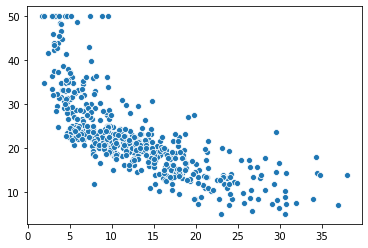

In [6]:
sns.scatterplot(X,y,)

## 2.

In [7]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [8]:
poly = pf(degree = 5)
boston = pd.DataFrame(poly.fit_transform(X.reshape(-1,1)))

### 3.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston, y, test_size=0.3, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.7

### 4. 

In [10]:
bos_model = LinearRegression()

In [11]:
bos_model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_hat_test = bos_model.predict(X_test)

In [13]:
bos_predictions = pd.DataFrame({"y_test":y_test, "y_hat_test":y_hat_test, "resid": y_test - y_hat_test})
bos_predictions

,y_test,y_hat_test,resid
0,21.8,21.514132,0.285868
1,10.2,18.150191,-7.950191
2,15.2,16.197956,-0.997956
3,43.5,40.765901,2.734099
4,50.0,22.373052,27.626948
...,...,...,...
147,24.6,27.987713,-3.387713
148,24.8,26.921299,-2.121299
149,32.7,30.338381,2.361619
150,13.3,14.491734,-1.191734


In [14]:
MSE_test = np.mean(np.square(bos_predictions['resid']))
np.round(MSE_test,3)

27.083

In [15]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.204

### 5. RMSE using K-fold

In [16]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [17]:
bos_estimator = LinearRegression()

In [18]:
NMSE5 = cross_val_score(estimator=bos_estimator, X=X_test, y=y_test, cv=5, scoring="neg_mean_squared_error")
NMSE5

array([-45.05131419, -18.22782543, -14.42053134, -37.4270553 ,
       -16.51192169])

In [19]:
MSE5 = -NMSE5
MSE5

array([45.05131419, 18.22782543, 14.42053134, 37.4270553 , 16.51192169])

In [20]:
MSE_CV5 = np.mean(MSE5)
np.round(MSE5, 3)

array([45.051, 18.228, 14.421, 37.427, 16.512])

In [21]:
RMSE5 = np.sqrt(MSE5)
RMSE5

array([6.71202758, 4.26940575, 3.79743747, 6.11776555, 4.0634864 ])

In [22]:
RMSE_CV5 = np.mean(RMSE5)
np.round(RMSE_CV5,3)

4.992

### 7. Polynomial Regression

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test

    


In [24]:
my_polynomial_regression(poly_degree = 5, X=X, y=y)

(5, 4.72, 6.15)

In [25]:
returns = []
for i in range(1,11):
        returns.append(my_polynomial_regression(poly_degree = i, X=X, y=y))

In [26]:
output = pd.DataFrame(returns, columns=["Degree", "RMSE_train", "RMSE_test"])
output

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.88
1,2,5.13,6.32
2,3,4.95,6.26
3,4,4.82,6.16
4,5,4.72,6.15
5,6,4.70,6.17
6,7,4.69,6.17
7,8,4.69,6.16
8,9,4.69,6.15
9,10,4.69,6.15


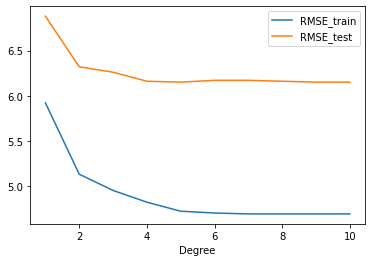

In [27]:
output.set_index('Degree').plot()
plt.show()

The optimal Polynomial degree is 5. At this degree, we calculated the lowest RMSE for the test set. We also calculated the same value for the 9th and 10th degree, but we would rather choose a lower degree of complexity to avoid overfitting the model. 